In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Tempo Detection

In [31]:
from essentia.standard import MonoLoader, TempoCNN


sr = 11025
audio = MonoLoader(filename="sample/ambienceTrack_001(1).mp3", sampleRate=sr, resampleQuality=4)()
model = TempoCNN(graphFilename="weights/deepsquare-k16-3.pb")
global_tempo, local_tempos, _ = model(audio)
global_tempo, local_tempos.shape, local_tempos.mean()

[   INFO   ] TensorflowPredict: Successfully loaded graph file: `weights/deepsquare-k16-3.pb`


(153.0, (151,), 120.75497)

In [20]:
window = 6
all_beats = [0]
for i, bpm in enumerate(local_tempos):
    beat_length = np.round(240 / bpm, 2)
    # print('bpm:', bpm, '   - beat_length:', beat_length)
    all_beats += np.arange(all_beats[-1], (i+1)*window, beat_length).tolist()

len(all_beats)

629

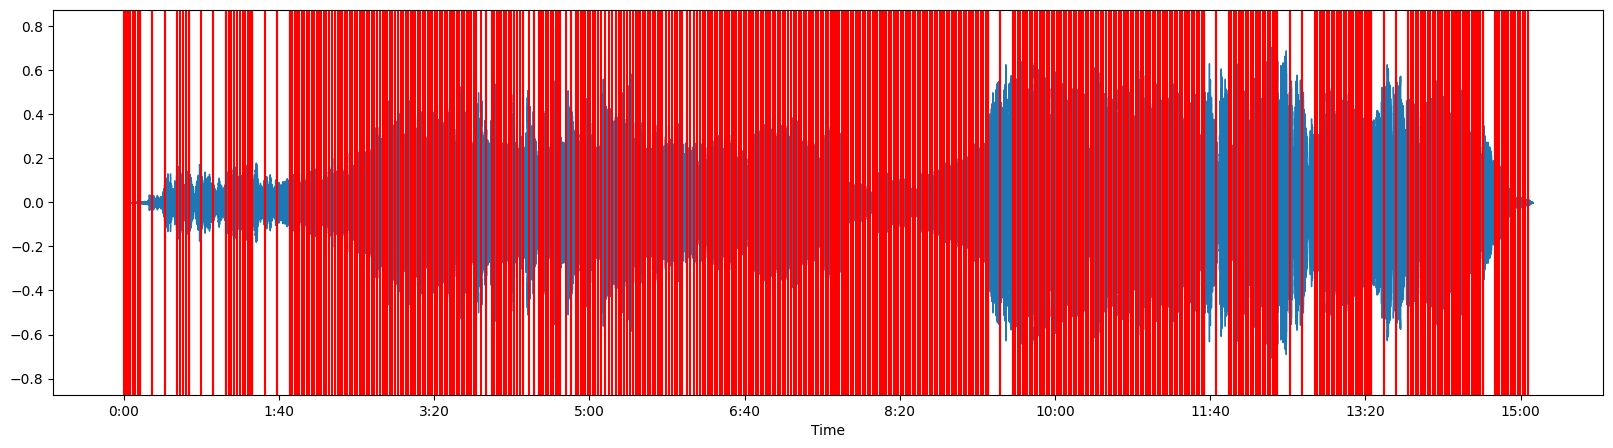

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
librosa.display.waveshow(audio, sr=sr)

for beat in all_beats:
    plt.axvline(x=beat, color='red')

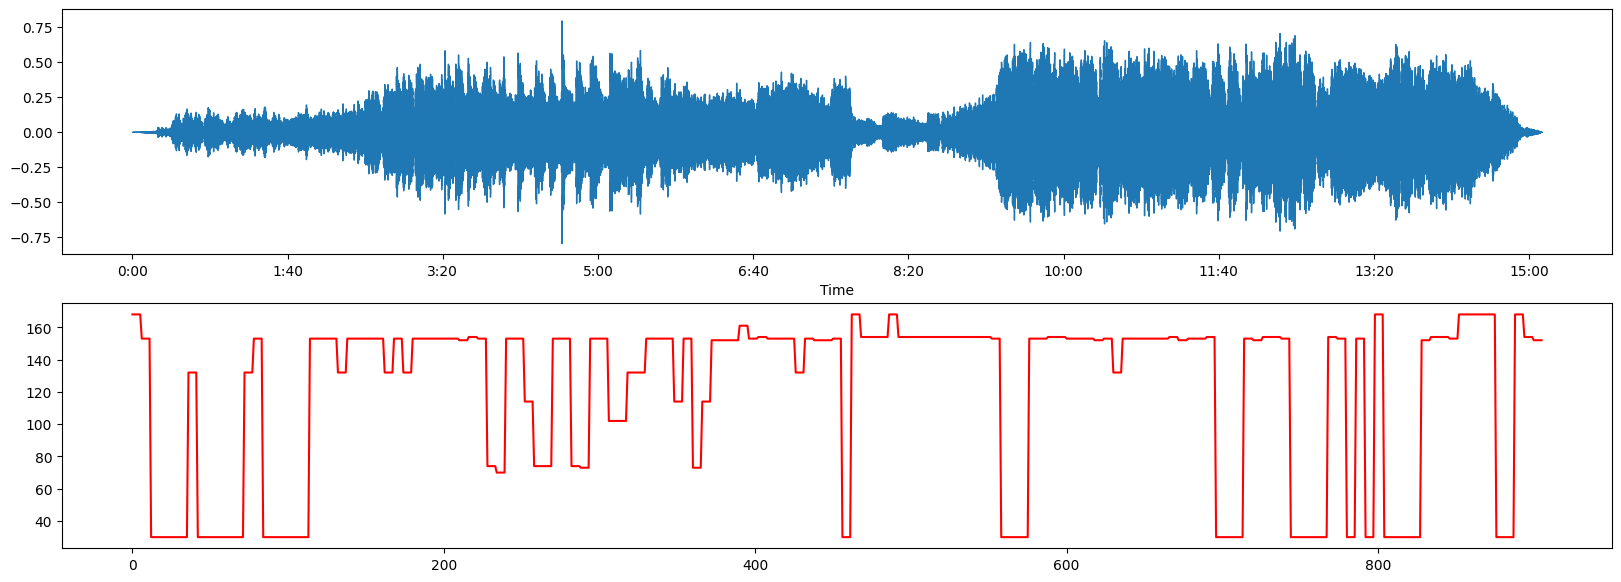

In [27]:
plt.figure(figsize=(20,7))
plt.subplot(211)
librosa.display.waveshow(audio, sr=11025)
plt.subplot(212)
plt.plot(np.repeat(local_tempos, 6), c='red')

# Beat Detection

In [22]:
from BeatNet.BeatNet import BeatNet

# estimator = BeatNet(1, mode='online', inference_model='PF', plot=['activations'], thread=False)
estimator = BeatNet(1, mode='offline', inference_model='DBN', plot=[], thread=False)
beats = estimator.process(audio_path='sample/ambienceTrack_001(1).mp3')[:, 0]
beats.shape

(1802,)

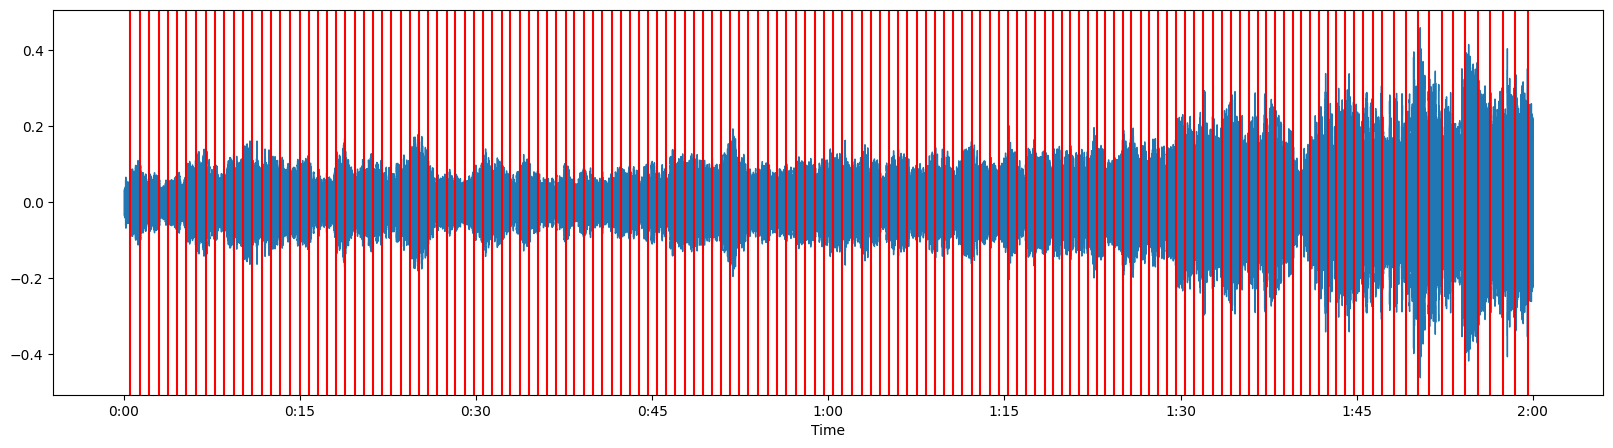

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
s = 1 * 60 
e = 3 * 60
librosa.display.waveshow(audio[s * sr: e * sr], sr=sr)

for beat in beats[(beats > s) & (beats < e)]:
    plt.axvline(x=beat-s, color='red')

In [42]:
window = 12
loc_tempos = []
for i in range(audio.shape[0] // sr):
    loc_tempos += [beats[(beats < i + window) & (beats > i)].shape[0] * 5]
len(loc_tempos)

908

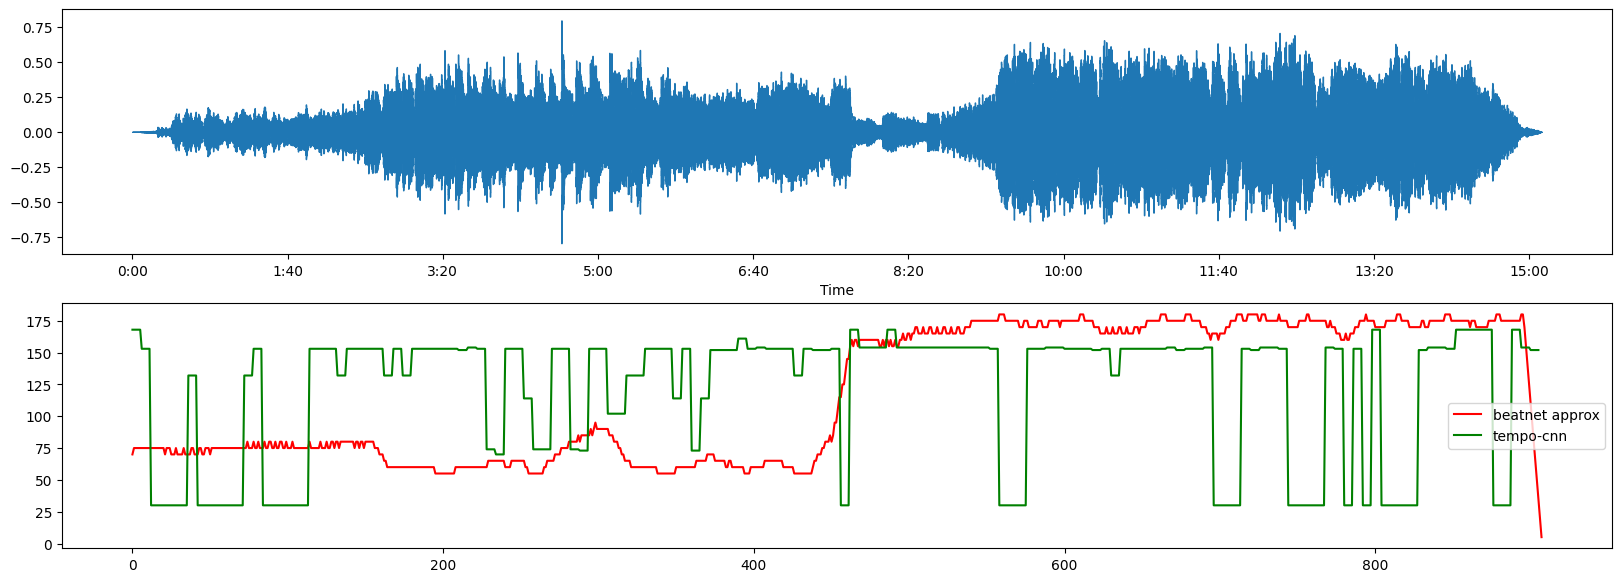

In [46]:
plt.figure(figsize=(20,7))
plt.subplot(211)
librosa.display.waveshow(audio, sr=11025)
plt.subplot(212)
plt.plot(loc_tempos, c='red', label='beatnet approx')
plt.plot(np.repeat(local_tempos, 6), c='green', label='tempo-cnn')
plt.legend()
plt.show()

## Transcription

In [33]:
from basic_pitch.inference import predict

model_output, midi_data, _ = predict("sample/ambienceTrack_001(1).mp3")

scikit-learn version 1.5.0 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.
TensorFlow version 2.15.0 has not been tested with coremltools. You may run into unexpected errors. TensorFlow 2.12.0 is the most recent version that has been tested.
Torch version 2.3.1 has not been tested with coremltools. You may run into unexpected errors. Torch 2.2.0 is the most recent version that has been tested.


Predicting MIDI for sample/ambienceTrack_001(1).mp3...


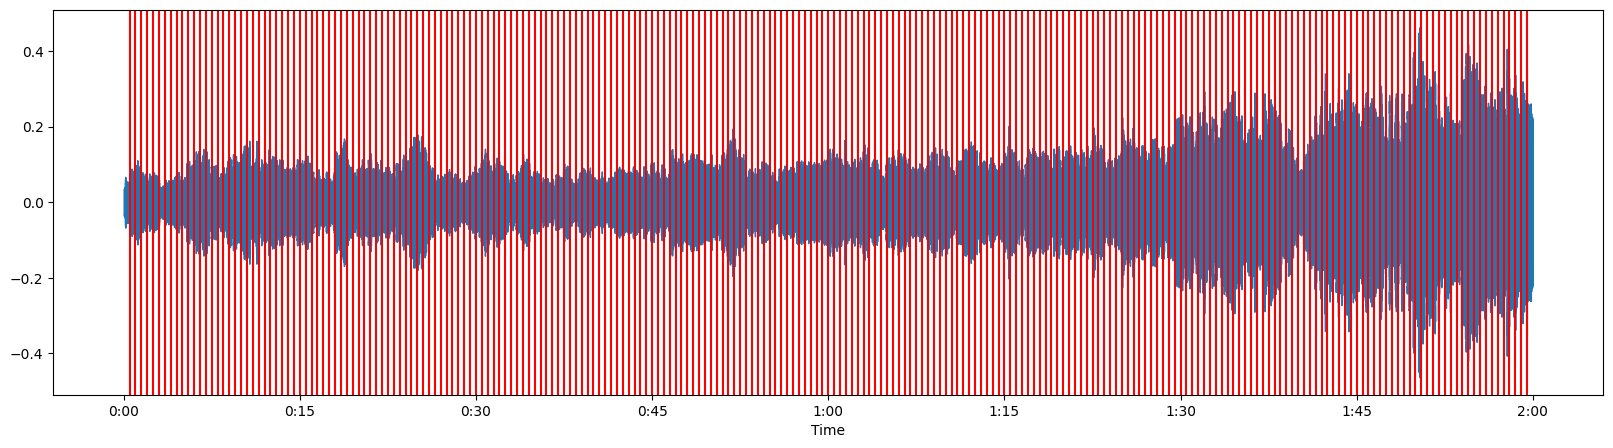

In [34]:
audio, sr = librosa.load('sample/ambienceTrack_001(1).mp3', sr=22050)

s = 1 * 60 
e = 3 * 60
plt.figure(figsize=(20, 5))
librosa.display.waveshow(audio[s * sr: e * sr], sr=sr)

beats = midi_data.get_beats()
for beat in beats[(beats > s) & (beats < e)]:
    plt.axvline(x=beat-s, color='red')

In [4]:
midi_data.estimate_tempo(), 

(169.10596766977997,
 array([  5.2270576 ,  15.18322766,  16.84473832, ..., 899.73823673,
        900.19230975, 900.81924853]))

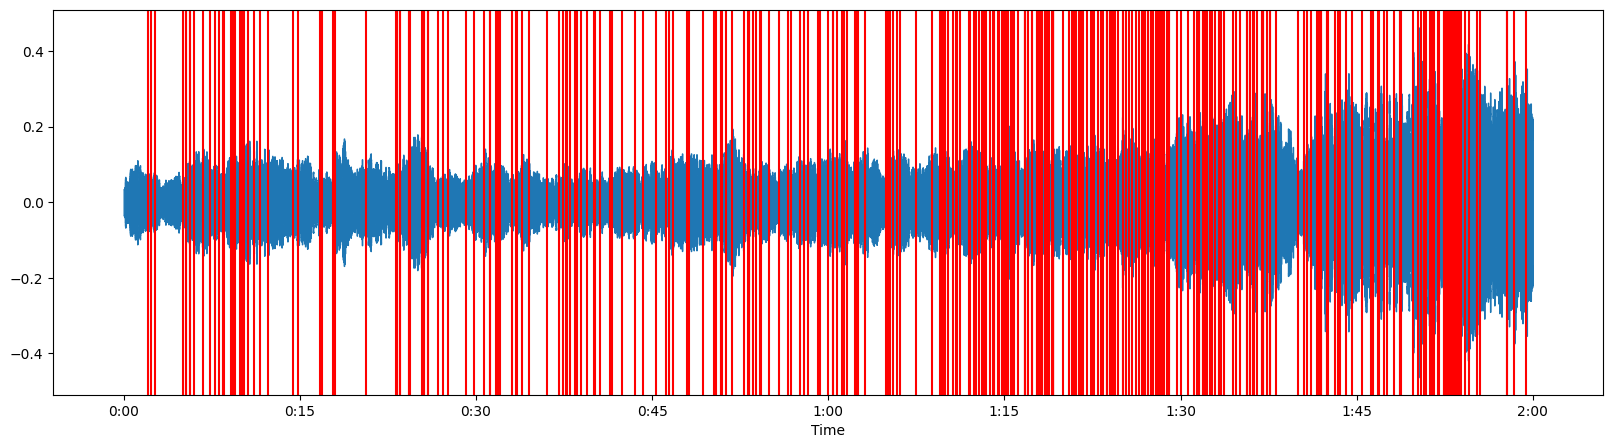

In [5]:
s = 1 * 60 
e = 3 * 60
plt.figure(figsize=(20, 5))
librosa.display.waveshow(audio[s * sr: e * sr], sr=sr)

onsets = midi_data.get_onsets()
for onset in onsets[(onsets > s) & (onsets < e)]:
    plt.axvline(x=onset-s, color='red')